# 4. Creating Plots on Data Aware Grids
Using Seaborn to draw multiple plots in a single figure.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Using FacetGrid, factorplot and lmplot
One of Seaborn's most powerful features is its ability to combine multiple smaller plots into a larger visualization that can help identify trends in data with many variables. 

### Multiple plots of data
The concept of small multiples is useful for analyzing data with many variables. The idea is that you can quickly identify trends in data by comparing multiple plots side by side using the same scales and axes. These plots are referred to as a trellis or lattice plot. In data science, this concept is also frequently called faceting.

### Tidy data
One very important requirement for Seaborn to create these plots is that the data must be in **tidy format**. This means that each row of the data is a **single observation** and the columns contain the variables. Once the data is in this format, Seaborn can perform a lot of the heavy lifting needed to create these small multiple plots.

### FacetGrid
Seaborn's FacetGrid manages the back end data manipulations to make sure that the data is split across rows, columns, and hue and then used to make the appropriate plot type. The key point to remember is that `FacetGrid()` provides a lot of flexibility, but you must use a two step process of defining the Facets and mapping the plot type.

### FacetGrid Categorical Example
This example shows how to map a boxplot onto a data-aware `FacetGrid()`. 
- The first step is to set up `FacetGrid()` with the column defined as the Highest Degree awarded by the school. 
- The next step is to plot a boxplot of the `Tuition` values. In this case, we also define the `order` we want the degrees to be displayed in. 

In [2]:
college_df = pd.read_csv('college_datav3.csv')

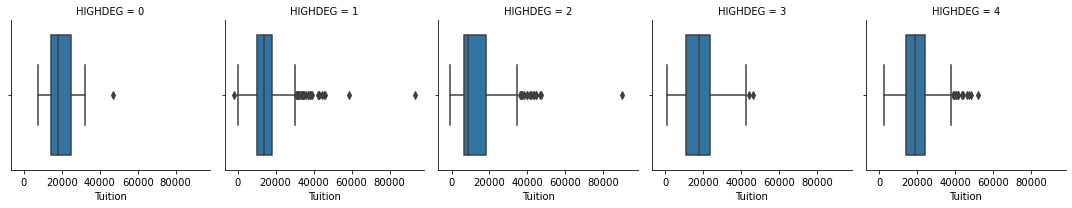

In [3]:
g = sns.FacetGrid(college_df, col='HIGHDEG')
g.map(sns.boxplot, 'Tuition', order=['1', '2', '3', '4'])

This example could be expanded to include other variables to divide the data by rows.

### `catplot()` (or `factorplot()`)
Seaborn's `catplot` is very powerful and flexible but involves multiple steps to create.
- The `catplot` is a simpler way to use a `FacetGrid` for categorical data
- Combines the facetting and mappling precess into 1 function

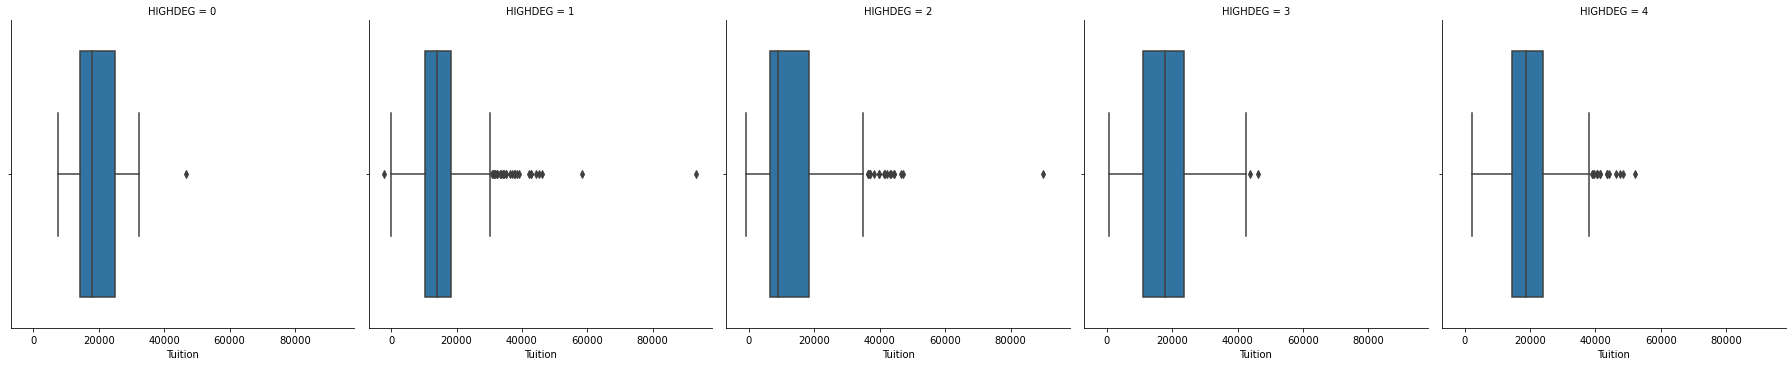

In [10]:
sns.catplot(x='Tuition', data=college_df, col='HIGHDEG', kind='box')

C:\Users\sj501\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


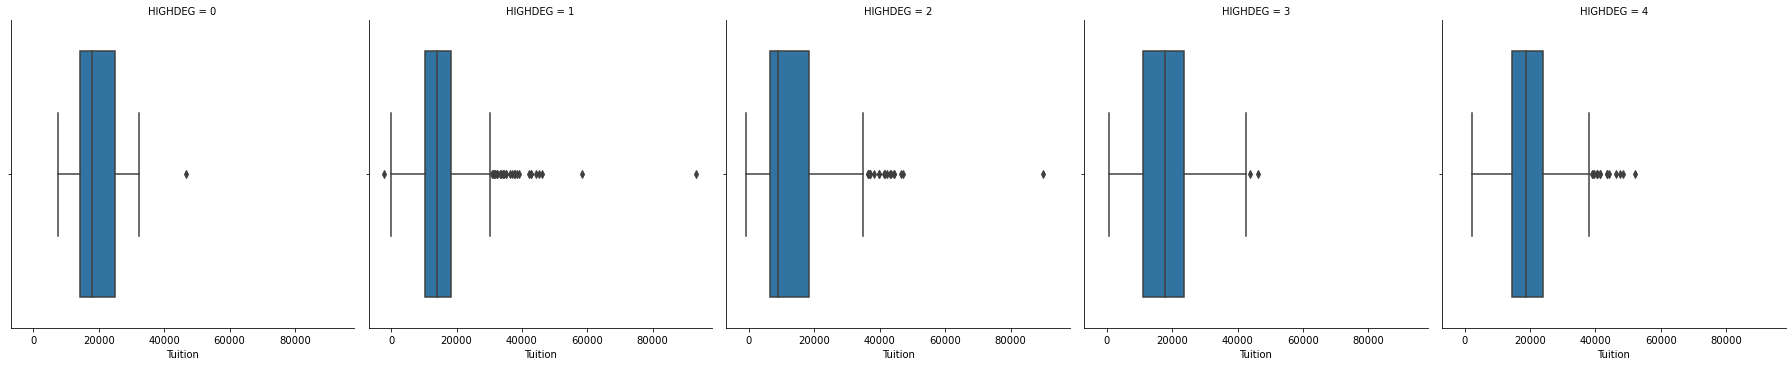

In [9]:
sns.factorplot(x='Tuition', data=college_df, col='HIGHDEG', kind='box')

### FacetGrid for regression
- `FacetGrid()` can also be used for scatter or regression plots

In this example, we can look at a simple scatter plot of Tuition compared to SAT Average across the different degree categories. We can use the same two step setup and mapping process as we did for the box plot.

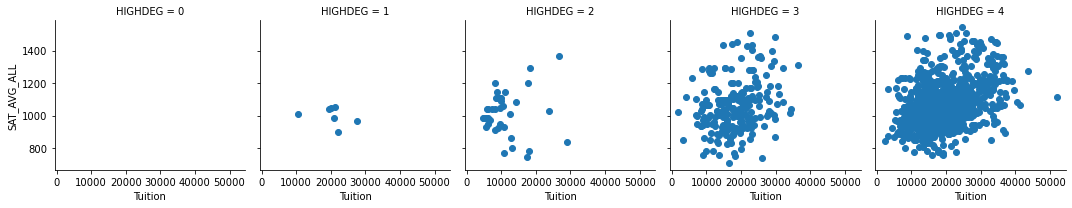

In [11]:
g = sns.FacetGrid(college_df, col='HIGHDEG')
g.map(plt.scatter, 'Tuition', 'SAT_AVG_ALL')

### lmplot
- `lmplot` plots scatter and regression plots on a `FacetGrid`

In this example, we create a plot that is similar to the `FacetGrid()` scatter plot. We have also disabled regression lines with the `fit_reg` equals False parameter.

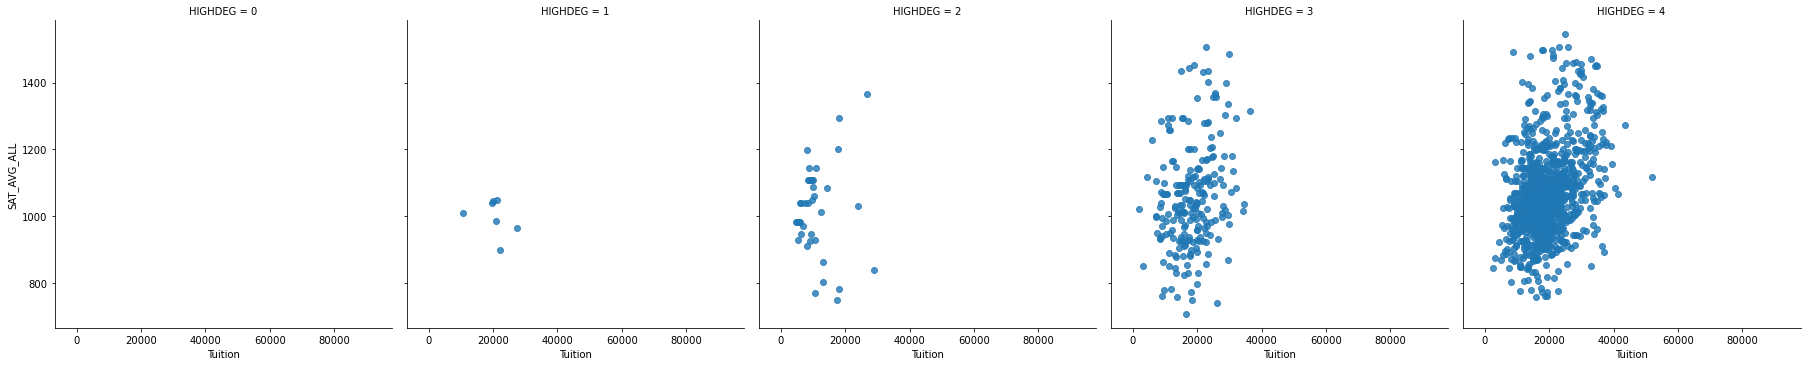

In [13]:
sns.lmplot(data=college_df, x='Tuition', y='SAT_AVG_ALL', col='HIGHDEG', fit_reg=False)

## Building a FacetGrid
Seaborn's `FacetGrid` is the foundation for building data-aware grids. A data-aware grid allows you to create a series of small plots that can be useful for understanding complex data relationships.

For these exercises, we will continue to look at the College Scorecard Data from the US Department of Education. This rich dataset has many interesting data elements that we can plot with Seaborn.

When building a `FacetGrid`, there are two steps:

1. Create a `FacetGrid` object with columns, rows, or hue.
2. Map individual plots to the grid.

- Create a `FacetGrid` that shows a point plot of the Average SAT scores `SAT_AVG_ALL`.
- Use `row_order` to control the display order of the degree types.

C:\Users\sj501\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


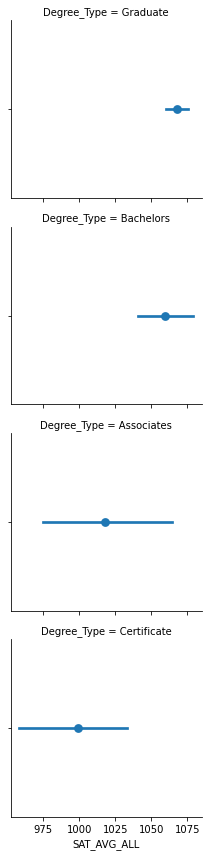

<Figure size 432x288 with 0 Axes>

In [17]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(college_df, row='Degree_Type', 
                   row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

*This plots tell us a lot about the relationships between Average SAT scores by Degree Types offered at a university.*

## Using a catplot(or factorplot)
In many cases, Seaborn's `catplot()` (or `factorplot()`) can be a simpler way to create a `FacetGrid`. Instead of creating a grid and mapping the plot, we can use the `catplot()` to create a plot with one line of code.

For this exercise, we will recreate one of the plots from the previous exercise using `catplot()` and show how to create a `boxplot` on a data-aware grid.

- Create a `catplot()` that contains a boxplot (`box`) of `Tuition` values varying by `Degree_Type` across rows.

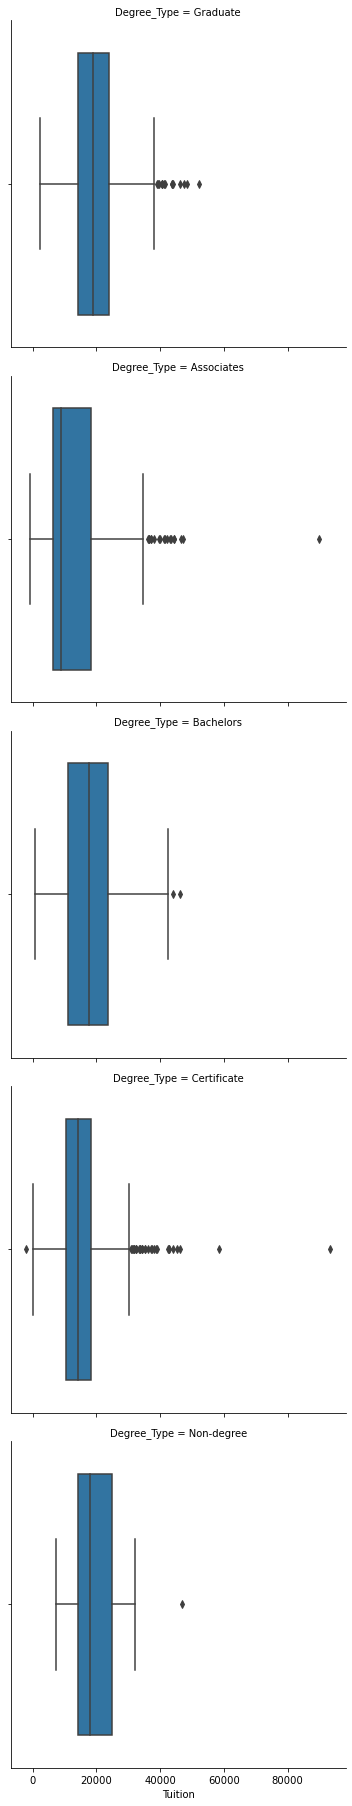

<Figure size 432x288 with 0 Axes>

In [22]:
# Create a catplot that contains boxplots of Tuition values
sns.catplot(data=college_df, x='Tuition', kind='box', row='Degree_Type')

plt.show()
plt.clf()

- Create a `catplot()` of SAT Averages (`SAT_AVG_ALL`) facetted across `Degree_Type` that shows a pointplot (`point`).
- Use `row_order` to order the degrees from highest to lowest level.

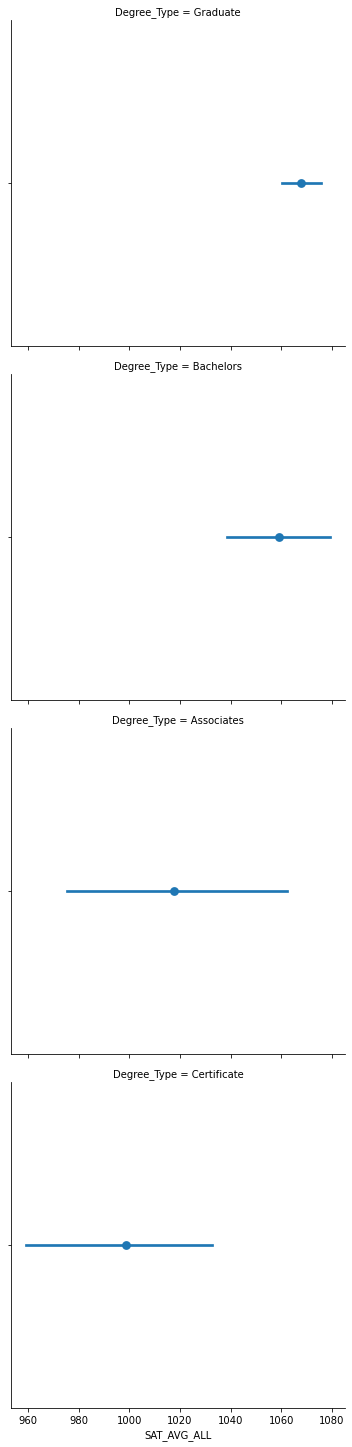

<Figure size 432x288 with 0 Axes>

In [24]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.catplot(data=college_df, x='SAT_AVG_ALL', kind='point', row='Degree_Type', 
            row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

*The* `catplot` *is often more convenient than using a* `FacetGrid` *for creating data aware grids.*

## Using a lmplot
The `lmplot` is used to plot scatter plots with regression lines on FacetGrid objects. The API is similar to `factorplot` with the difference that the default behavior of `lmplot` is to plot regression lines.

For the first set of exercises, we will look at the Undergraduate population (`UG`) and compare it to the percentage of students receiving Pell Grants (`PCTPELL`).

For the second `lmplot` exercise, we can look at the relationships between Average SAT scores and Tuition across the different degree types and public vs. non-profit schools.

- Create a `FacetGrid()` with `Degree_Type` columns and scatter plot of `UG` and `PCTPELL`.

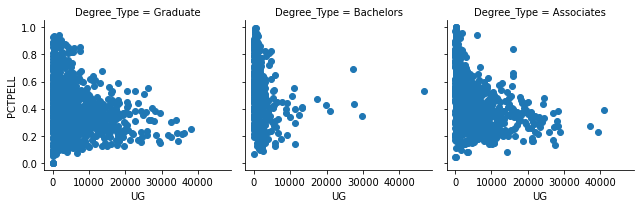

<Figure size 432x288 with 0 Axes>

In [26]:
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(college_df, col='Degree_Type', 
                  col_order=['Graduate', 'Bachelors', 'Associates'])

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

- Create a `lmplot()` using the same values from the `FacetGrid()`.

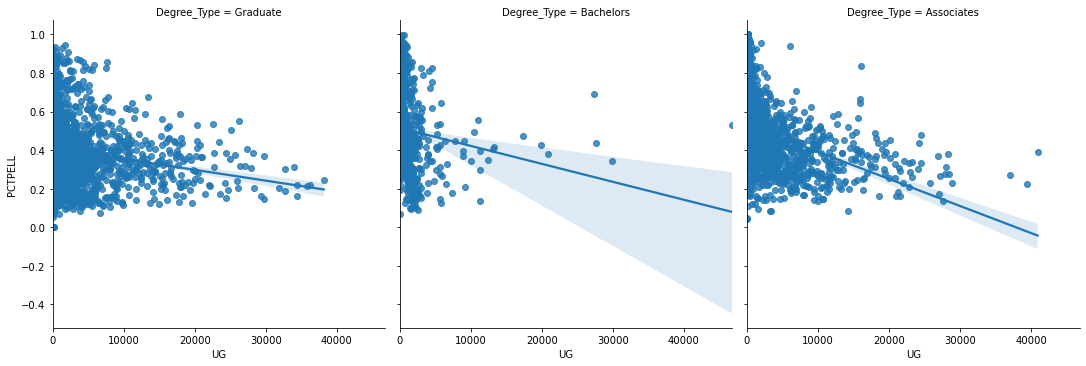

<Figure size 432x288 with 0 Axes>

In [27]:
# Re-create the plot above as an lmplot
sns.lmplot(data=college_df, x='UG', y='PCTPELL', col='Degree_Type', 
           col_order=['Graduate', 'Bachelors', 'Associates'])

plt.show()
plt.clf()

- Create a facetted `lmplot()` comparing `SAT_AVG_ALL` to `Tuition` with columns varying by `Ownership` and rows by `Degree_Type`.
- In the `lmplot() `add a `hue` for Women Only Universities.

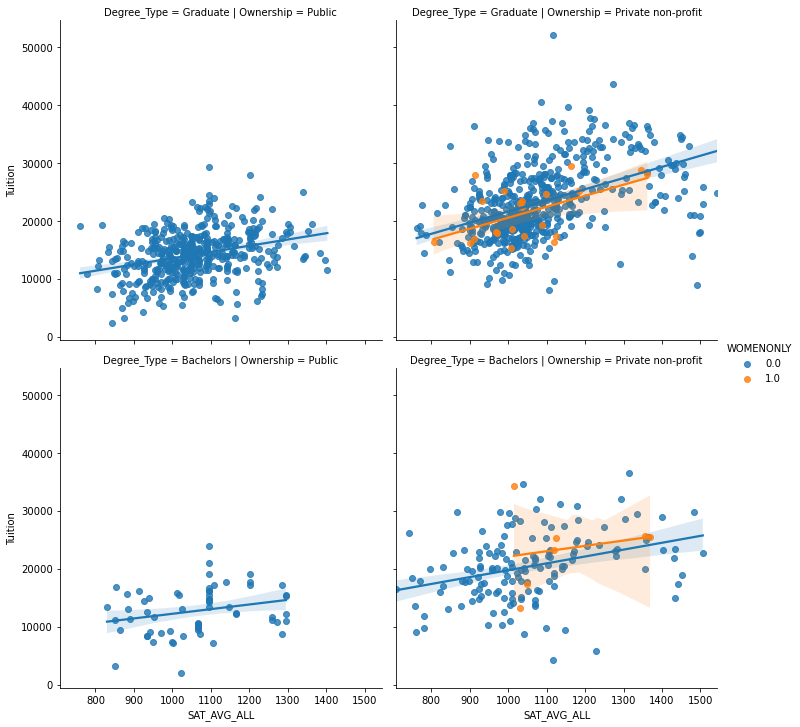

<Figure size 432x288 with 0 Axes>

In [28]:
# Create an lmplot that has a column for Ownership, 
# a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=college_df, x='SAT_AVG_ALL', y='Tuition', col='Ownership', row='Degree_Type', 
           col_order=['Public', 'Private non-profit'], row_order=['Graduate', 'Bachelors'],
           hue='WOMENONLY')

plt.show()
plt.clf()

*Creating small multiples of plots is very useful for many types of analysis. With Seaborn, it is easy to use the plot types to quickly perform complex visualizations.*

---

## Using PairGrid and pairplot
These plots are similar to the FacetGrid, factorplot, and lmplots because they allow us to see interactions across different columns of data. The difference with these plots is that we only define the columns of data we want to compare.

### Pairwise relationships
- `PairGrid` shows pairwaise relationships between two data elements.

In this example, we want to look at the relationships that might exist between the Fair Market Rent and Median Income of the tenants. 

In [4]:
house_df = pd.read_csv('FY18_4050_FMRs.csv')

### Creating a PairGrid
- The `PairGrid` follows similar API ti FacetGrid

The interesting point with this grid is that we do not define the row and column parameters. Instead we define the variables. In this case, the variables are the dataframe columns that we want to look at. The dataframe contains a Fair Market Rate column as well as a Median Income column, which we pass to the `PairGrid`. 

The next step is to let Seaborn know that we want to see a scatter plot visualization of the relationship between the two variables. Seaborn takes care of varying the x and y-axis for each of these plots.

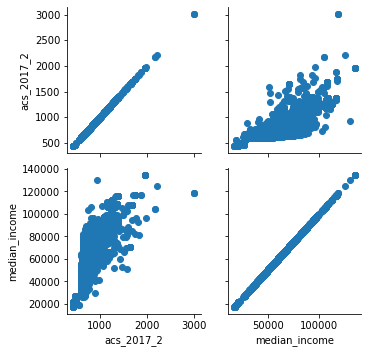

In [33]:
g = sns.PairGrid(house_df, vars=['acs_2017_2', 'median_income'])
g = g.map(plt.scatter)

### Customizing the PairGrid diagonals
In the previous example, the diagonals contained straight lines, which are not very insightful. Fortunately, the PairGrid supports defining the type of plots that can be displayed on the diagonals. 

You can use the `map_diag` function to **define the plotting function for the main diagonal**. 

The `map_offdiag` function **defines the other diagonal**. 

In this case, we are looking at a histogram plot of the Fair Market Rent and Median Income. 

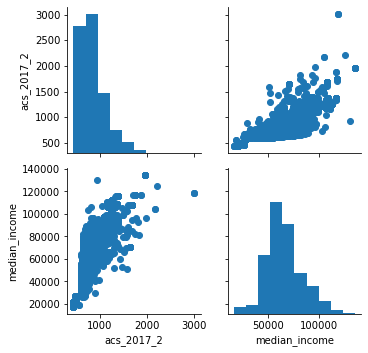

In [34]:
g = sns.PairGrid(house_df, vars=['acs_2017_2', 'median_income'])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

This view is much more useful than the previous scatter.

### Pairplot
- `pairplot` is a shortcut for the `PairGrid`

First, we define the variables like we did in the previous view. However, instead of mapping the plots, we can pass keywords to the function to specify the kind of plots for the main and off diagonals. 

The other nice aspect of this function is that it plots a regression line for us. This is a useful feature for visualizing potential relationships in the data.

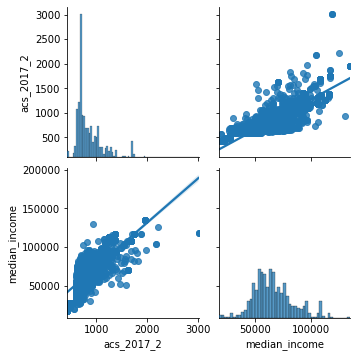

In [35]:
sns.pairplot(house_df, vars=['acs_2017_2', 'median_income'], kind='reg', diag_kind='hist')

## Building a PairGrid
When exploring a dataset, one of the earliest tasks is exploring the relationship between pairs of variables. This step is normally a precursor to additional investigation.

Seaborn supports this pair-wise analysis using the `PairGrid`. In this exercise, we will look at the Car Insurance Premium data.

In [5]:
ins_premiums = pd.read_csv('insurance_premiums.csv')

- Compare "fatal_collisions" to "premiums" by using a scatter plot mapped to a `PairGrid()`.

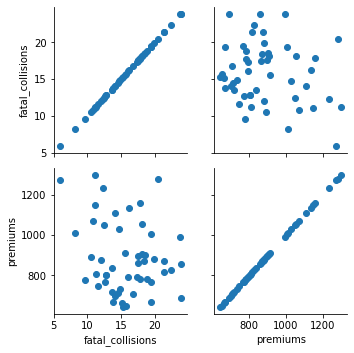

<Figure size 432x288 with 0 Axes>

In [39]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(ins_premiums, vars=["fatal_collisions", "premiums"])
g2 = g.map(plt.scatter)

plt.show()
plt.clf()

- Create another `PairGrid` but plot a histogram on the diagonal and scatter plot on the off diagonal.

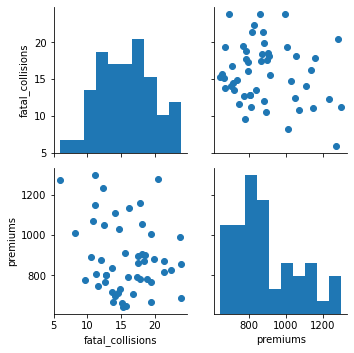

<Figure size 432x288 with 0 Axes>

In [41]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(ins_premiums, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

plt.show()
plt.clf()

*This analysis provides useful insight into the distribution of premium amounts as well as the limited relationships between* `fatal_collision` *and* `premiums`.

## Using a pairplot
The `pairplot()` function is generally a more convenient way to look at pairwise relationships. In this exercise, we will create the same results as the `PairGrid` using less code. Then, we will explore some additional functionality of the `pairplot()`. We will also use a different palette and adjust the transparency of the diagonal plots using the `alpha` parameter.

- Recreate the pairwise plot from the previous exercise using `pairplot()`.

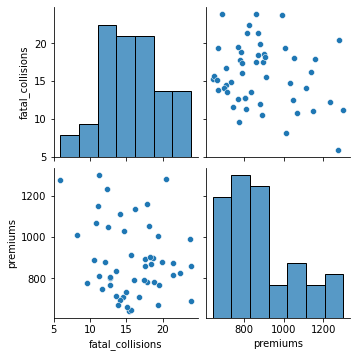

<Figure size 432x288 with 0 Axes>

In [42]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=ins_premiums, vars=["fatal_collisions", "premiums"], kind='scatter')

plt.show()
plt.clf()

- Create another pairplot using the "Region" to color code the results.
- Use the `RdBu` palette to change the colors of the plot.

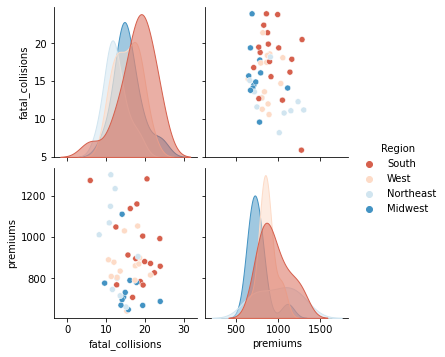

<Figure size 432x288 with 0 Axes>

In [47]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=ins_premiums, vars=['fatal_collisions', 'premiums'],
        kind='scatter', hue='Region', palette='RdBu', diag_kws={'alpha':.5})

plt.show()
plt.clf()

*The* `pairplot` *is generally a simpler than* `PairGrid` *for plotting complex relationships*

## Additional pairplots
This exercise will go through a couple of more examples of how the `pairplot()` can be customized for quickly analyzing data and determining areas of interest that might be worthy of additional analysis.

One area of customization that is useful is to explicitly define the `x_vars` and `y_vars` that you wish to examine. Instead of examining all pairwise relationships, this capability allows you to look only at the specific interactions that may be of interest.

We have already looked at using `kind` to control the types of plots. We can also use `diag_kind` to control the types of plots shown on the diagonals. In the final example, we will include a regression and kde plot in the `pairplot`.

- Create a pair plot that examines `fatal_collisions_speeding` and `fatal_collisions_alc` on the x axis and `premiums` and `insurance_losses` on the y axis.
- Use the `husl` palette and color code the scatter plot by `Region`.

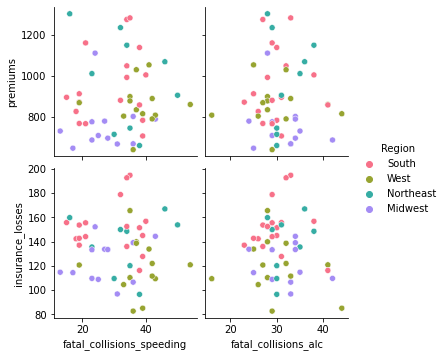

<Figure size 432x288 with 0 Axes>

In [49]:
# Build a pairplot with different x and y variables
sns.pairplot(data=ins_premiums, x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"], 
             y_vars=['premiums', 'insurance_losses'], kind='scatter', hue='Region', palette='husl')

plt.show()
plt.clf()

- Build a `pairplot()` with `kde` plots along the diagonals. Include the `insurance_losses` and `premiums` as the variables.
- Use a `reg` plot for the the non-diagonal plots.
- Use the `BrBG` palette for the final plot.

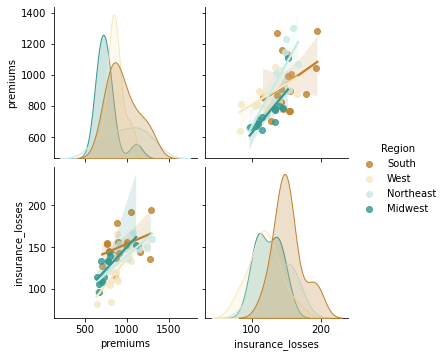

<Figure size 432x288 with 0 Axes>

In [51]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=ins_premiums, vars=['premiums', 'insurance_losses'], 
             kind='reg', palette='BrBG', diag_kind='kde', hue='Region')

plt.show()
plt.clf()

---

## Using JointGrid and jointplot
The final data-aware grid we will discuss is the JointGrid and its companion function, `jointplot()`. A `JointGrid()` allows us to compare the distribution of data between two variables. A `JointGrid()` makes use of scatter plots, regression lines, as well as histograms, distribution plots, and kernel density estimates to give us insight into our data.

### JointGrid() Overview
The JointGrid is similar to the other Grid plots in that it takes a small number of inputs and creates an insightful visualization of the data. 

The input to `JointGrid()` is an X and Y variable. 

In this case, we are looking at the relationship between College Tuition and the Admissions Rate.

### Basic JointGrid
The `JointGrid()` creation process follows the same steps as the other grids. You must define the grid and map the plots onto the grid. In this case, we define the Tuition and Admission Rates as the X and Y variables. Then we map Seaborn's `regplot()` and `distplot()` to the grid. Seaborn takes care of creating the plot.

C:\Users\sj501\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sj501\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sj501\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


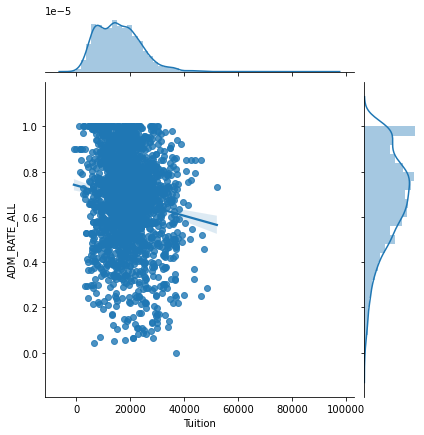

In [20]:
g = sns.JointGrid(data=college_df, x='Tuition', y='ADM_RATE_ALL')
g.plot(sns.regplot, sns.distplot)

Use `histplot()` instead of `distplot()`

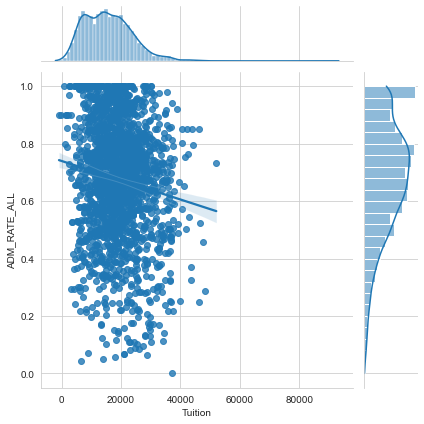

In [43]:
g = sns.JointGrid(data=college_df, x='Tuition', y='ADM_RATE_ALL')
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)

The center of the plot contains a scatter plot of these two variables. The plots along the x and y-axis show the distribution of the data for each variable. 

### Advanced JointGrid
The `plot_joint()` function specifies that a kde plot should be included in the center. The `kdeplots` on the margins are defined with `plot_marginals()`. 

We also use the `annotate()` function to define additional information about the relationship of the variables. 

~~Python's SciPy stats library contains a function that calculates the Pearson correlation value. Seaborn takes care of applying that function and labeling the graph with this value. This view of the data helps us understand the distributions of data for these two variables.~~ 

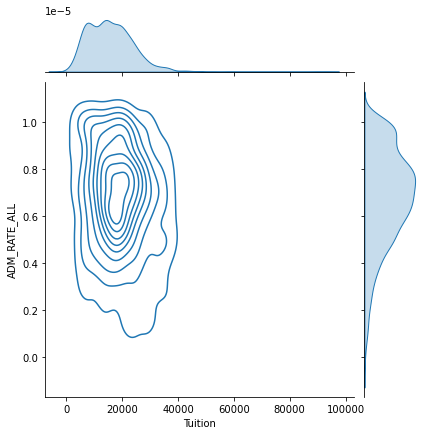

In [29]:
#from scipy import stats
g = sns.JointGrid(data=college_df, x='Tuition', y='ADM_RATE_ALL')
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade=True)
#g = g.annotate(stats.pearsonr)

```
In this example, there is a large group of values that have tuition between $15,000 and $20,000 and admission rates around 60%.
```

### jointplot()
The `jointplot()` is easier to use but provides fewer customization capabilities. In this example, we show a hex plot as the method to demonstrate the relationship between the two variables.

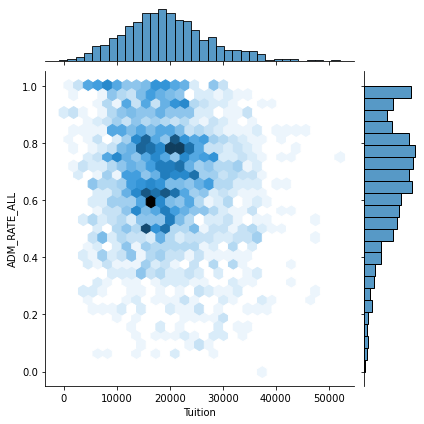

In [31]:
sns.jointplot(data=college_df, x='Tuition', y='ADM_RATE_ALL', kind='hex')

~~Seaborn automatically includes the Pearson r correlation in this plot.~~ As you can see, this is a simpler approach than creating the `JointGrid()`.

### Customizing a jointplot
The `jointplot()` supports simple creation of scatter, hex, residual, regression, and kde plots. It can also support adding overlay plots to enhance the final output.

This example, shows a fairly common paradigm for analyzing the data with Seaborn. In addition to defining the X and Y variables, we set the limits for the x-axis to cut off at 0 and 25,000. We also pass keywords to the marginal plot to control the structure of the histogram. 

In this case, we only want to look at the distribution of results for public universities with an undergraduate enrollment less than 2,500 students. Finally, by including the `plot_joint()` function, a kde plot is overlaid on the scatter plot.

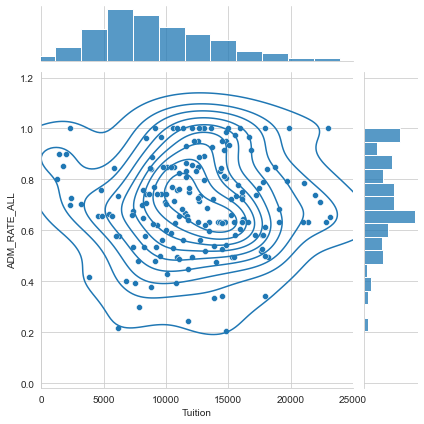

In [50]:
g = (sns.jointplot(x='Tuition', y='ADM_RATE_ALL', kind='scatter', 
                   xlim=(0, 25000), marginal_kws=dict(bins=15), 
                   data=college_df.query('UG < 2500 & Ownership == "Public"')).plot_joint(sns.kdeplot))

This combination of plots is useful for understanding the areas where Tuition and Admission rates have natural groupings. ~~Finally, Seaborn includes the Pearson r coefficient and p-value to summarize the statistical significance of the relationship.~~

## Building a JointGrid and jointplot
Seaborn's `JointGrid` combines univariate plots such as histograms, rug plots and kde plots with bivariate plots such as scatter and regression plots. The process for creating these plots should be familiar to you now. These plots also demonstrate how Seaborn provides convenient functions to combine multiple plots together.

For these exercises, we will use the bike share data.

In [37]:
bike_df = pd.read_csv('bike_share.csv')

 In this exercise, we will look at the relationship between humidity levels and total rentals to see if there is an interesting relationship we might want to explore later.

- Use Seaborn's "whitegrid" style for these plots.
- Create a `JointGrid()` with "hum" on the x-axis and "total_rentals" on the y.
- Plot a `regplot()` and `distplot()` on the margins.

C:\Users\sj501\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sj501\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sj501\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


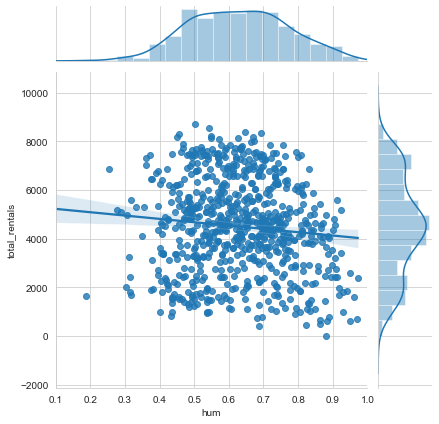

<Figure size 432x288 with 0 Axes>

In [38]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style('whitegrid')
g = sns.JointGrid(x='hum', y='total_rentals', data=bike_df, xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.distplot)

plt.show()
plt.clf()

Use `histplot()` instead of `distplot()`

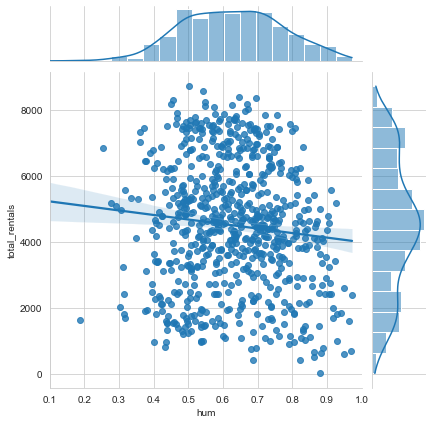

<Figure size 432x288 with 0 Axes>

In [39]:
sns.set_style('whitegrid')
g = sns.JointGrid(x='hum', y='total_rentals', data=bike_df, xlim=(0.1, 1.0)) 

g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)

plt.show()
plt.clf()

- Re-create the plot using a `jointplot()`.

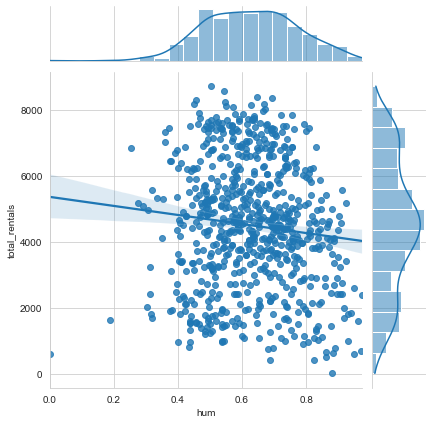

<Figure size 432x288 with 0 Axes>

In [40]:
# Create a jointplot similar to the JointGrid 
sns.jointplot(x='hum', y='total_rentals', kind='reg', data=bike_df)

plt.show()
plt.clf()

*These plots show that there is limited relationship between rental amounts and humidity levels.*

## Jointplots and regression
Since the previous plot does not show a relationship between humidity and rental amounts, we can look at another variable that we reviewed earlier. Specifically, the relationship between `temp` and `total_rentals`.

- Create a `jointplot` with a 2nd order polynomial regression plot comparing `temp` and `total_rentals`.

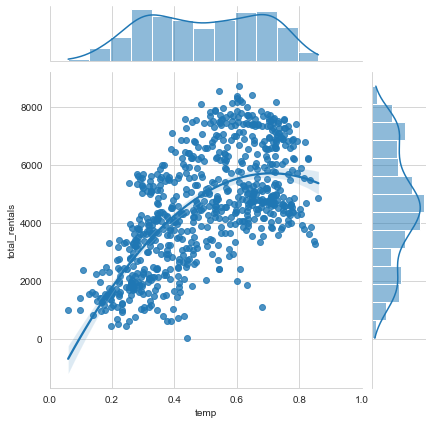

<Figure size 432x288 with 0 Axes>

In [45]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x='temp', y='total_rentals', kind='reg', 
              data=bike_df, order=2, xlim=(0, 1))

plt.show()
plt.clf()

- Use a residual plot to check the appropriateness of the model.

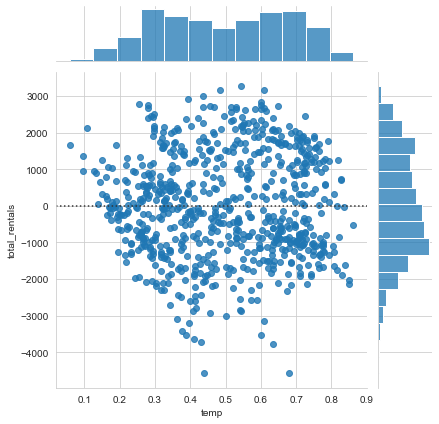

<Figure size 432x288 with 0 Axes>

In [47]:
# Plot a jointplot showing the residuals
sns.jointplot(x='temp', y='total_rentals', kind='resid', data=bike_df, order=2)

plt.show()
plt.clf()

*Based on the residual plot ~~and the pearson r value~~ there is a positive relationship between* `temperature` *and* `total_rentals`.

## Complex jointplots
The `jointplot` is a convenience wrapper around many of the `JointGrid` functions. However, it is possible to overlay some of the `JointGrid` plots on top of the standard `jointplot`. In this example, we can look at the different distributions for riders that are considered `casual` versus those that are `registered`.

- Create a `jointplot` with a scatter plot comparing `temp` and `casual` riders.
- Overlay a `kdeplot` on top of the scatter plot.

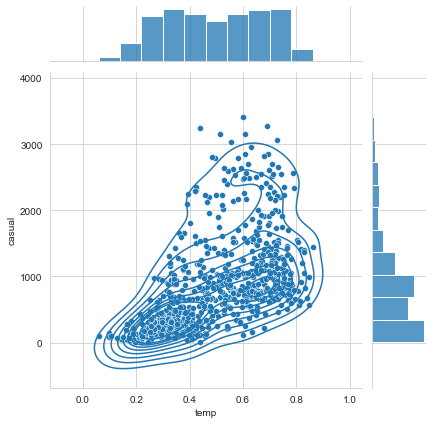

<Figure size 432x288 with 0 Axes>

In [49]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x='temp', y='casual', kind='scatter', data=bike_df, 
                   marginal_kws=dict(bins=10)).plot_joint(sns.kdeplot))
    
plt.show()
plt.clf()

- Build a similar plot for `registered` users.

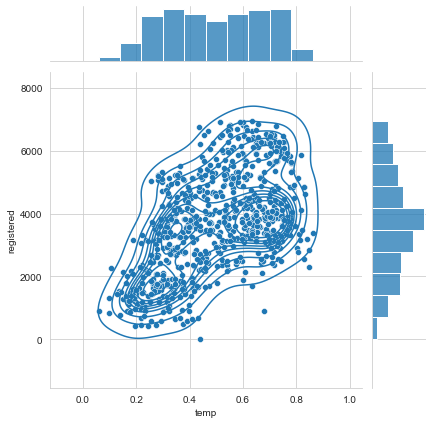

<Figure size 432x288 with 0 Axes>

In [51]:
# Replicate the above plot but only for registered riders
g = (sns.jointplot(x='temp', y='registered', kind='scatter', 
                   data=bike_df, marginal_kws=dict(bins=10)).plot_joint(sns.kdeplot))

plt.show()
plt.clf()